In [88]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

In [89]:
# Grab the training images from destination, resize them, and append them to the placeholder lists
train_images = []

train_files = sorted(glob.glob ("../Train_Images/IMG_*.jpg"))

for myFile in train_files:
    img = cv2.imread(myFile)
    img = cv2.resize(img,(256,256))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    train_images.append(img)

print(np.array(train_images).shape)

(75, 256, 256, 3)


In [90]:
# Train images' ROI (face rectangle) coordinates [x,y,w,h] where (x,y) are the coords of top left corner
# (in order of image name)
quentin_train_ROI = [[98, 70, 51, 51], [100, 71, 36, 43], [90, 75, 35, 50], [122, 73, 30, 48], [125, 75, 35, 50], [98, 60, 67, 75], [80, 62, 55, 73], [80, 55, 47, 78], [100, 75, 50, 68], [98, 62, 51, 90], [55, 70, 120, 133], [80, 72, 85, 125], [70, 90, 80, 120], [60, 67, 90, 127], [97, 54, 88, 156]]
connor_train_ROI = [[112, 94, 46, 46], [103, 98, 45, 45], [103, 103, 38, 47], [109, 96, 39, 49], [115, 104, 30, 47], [92, 80, 60, 65], [100, 77, 45, 67], [70, 83, 51, 67], [100, 80, 50, 70], [106, 81, 44, 69], [80, 60, 105, 122], [70, 63, 105, 125], [50, 80, 80, 120], [98, 75, 80, 118], [112, 59, 75, 131]]
bogdan_train_ROI = [[100, 105, 57, 57], [120, 111, 27, 42], [128, 106, 35, 44], [95, 102, 38, 46], [89, 105, 36, 50], [95, 96, 62, 62], [124, 104, 47, 65], [131, 99, 52, 67], [91, 87, 65, 80], [76, 91, 60, 75], [68, 72, 133, 140], [89, 80, 100, 125], [107, 78, 80, 130], [45, 84, 115, 120], [60, 89, 102, 110]]
julien_train_ROI = [[94, 79, 51, 51], [112, 89, 37, 43], [110, 90, 35, 60], [120, 85, 40, 50], [110, 90, 45, 50], [95, 87, 59, 70], [108, 80, 50, 75], [100, 77, 50, 77], [95, 75, 50, 75], [110, 75, 50, 75], [75, 75, 95, 120], [90, 75, 90, 125], [75, 75, 100, 125], [77, 56, 127, 140], [100, 75, 80, 125]]
sarah_train_ROI = [[113, 103, 29, 29], [107, 95, 30, 30], [114, 95, 29, 29], [97, 101, 29, 29], [105, 104, 20, 32], [96, 81, 54, 54], [104, 84, 51, 51], [116, 90, 38, 44], [81, 88, 50, 50], [83, 90, 28, 40], [68, 83, 89, 89], [77, 80, 84, 84], [93, 91, 70, 80], [74, 94, 77, 77], [58, 86, 70, 102]] 

train_ROI = []

train_ROI = np.vstack((quentin_train_ROI, connor_train_ROI, bogdan_train_ROI, julien_train_ROI, sarah_train_ROI))

print(np.array(train_ROI).shape)

(75, 4)


Num keypoints: 32
Num descriptors per keypoint: 128


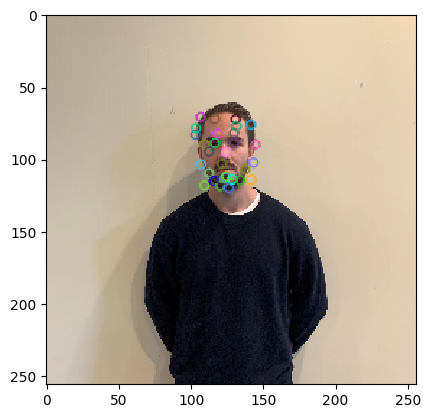

Num keypoints: 23
Num descriptors per keypoint: 128


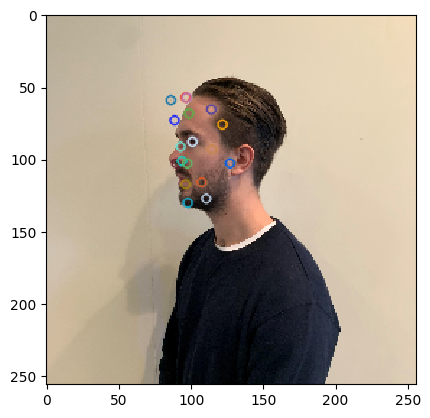

Num keypoints: 48
Num descriptors per keypoint: 128


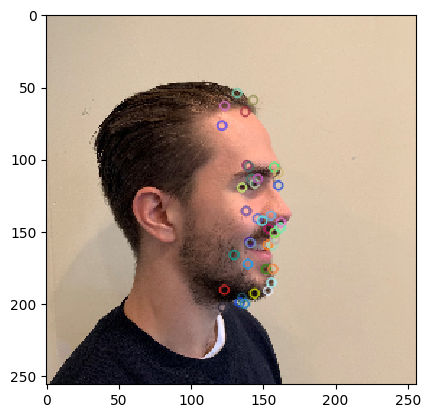

Num keypoints: 34
Num descriptors per keypoint: 128


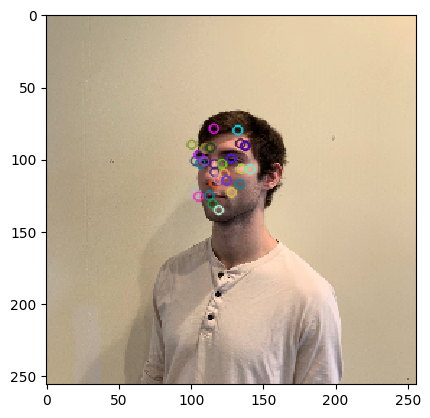

Num keypoints: 51
Num descriptors per keypoint: 128


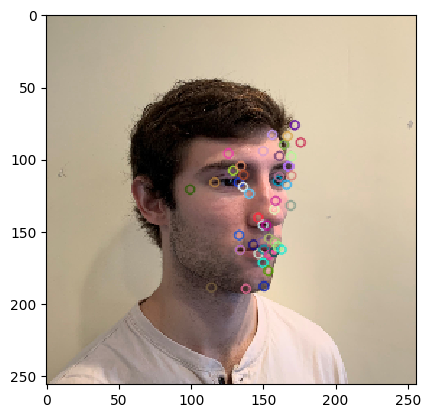

Num keypoints: 39
Num descriptors per keypoint: 128


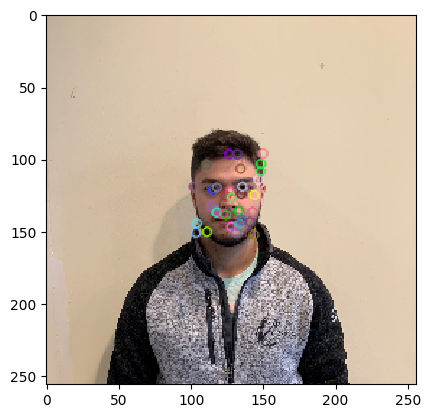

Num keypoints: 52
Num descriptors per keypoint: 128


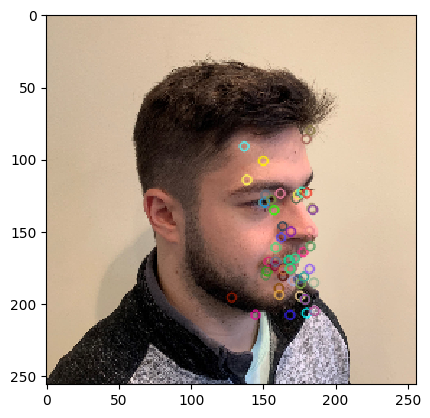

Num keypoints: 24
Num descriptors per keypoint: 128


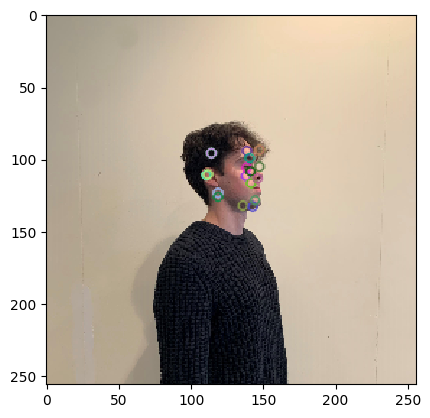

Num keypoints: 55
Num descriptors per keypoint: 128


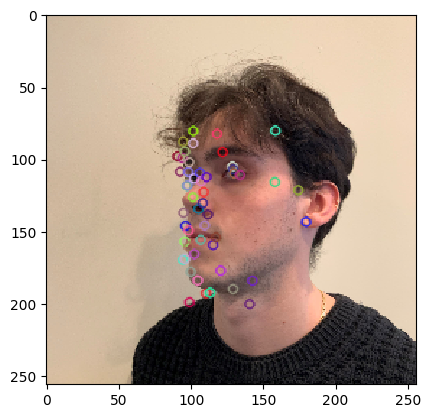

Num keypoints: 19
Num descriptors per keypoint: 128


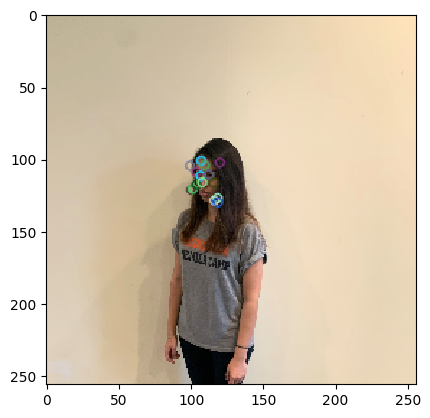

Num keypoints: 39
Num descriptors per keypoint: 128


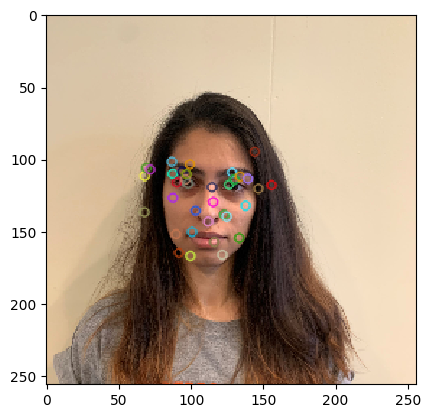

In [91]:
sift_obj = cv2.xfeatures2d.SIFT_create()

train_features = []
train_descriptors = []
train_labels = [0,1,2,3,4]
train_Y = []

label = -1
for i in range(len(train_ROI)):
    if(i%15 == 0):
        label += 1
    train_Y.append(train_labels[label])
    [x,y,w,h] = train_ROI[i]
    
    # create a mask image filled with zeros, the size of original image
    mask = np.zeros(train_images[i].shape[:2], dtype=np.uint8)
    
    # draw your selected ROI on the mask image
    cv2.rectangle(mask, (x,y), ((x+w),(y+h)), (255), thickness = -1)
    
    # provide mask to the detect method
    keypoints, descriptors = sift_obj.detectAndCompute(train_images[i],mask)

    train_features.append(keypoints)
    train_descriptors.append(descriptors)
    
    if (i%7==0):
        copy_train_image = train_images[i].copy()
        img_display = cv2.drawKeypoints(train_images[i],keypoints,copy_train_image)
        print('Num keypoints: '+ str(len(keypoints)))
        print('Num descriptors per keypoint: '+ str(descriptors.shape[1]))
#         plt.figure(figsize=(20,20))
        plt.imshow(img_display)
        plt.show()

In [92]:
# Grab the test images from destination, resize them, and append them to the placeholder lists
test_images = []

test_files = sorted(glob.glob("../Test_Images/IMG_*.jpg"))
for myFile in test_files:
    img = cv2.imread(myFile)
    img = cv2.resize(img,(256,256))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    
    test_images.append(img)

print(np.array(test_images).shape)

(70, 256, 256, 3)


In [93]:
# Test images' ROI (face rectangle) coordinates [x,y,w,h] where (x,y) are the coords of top left corner
# (in order of image name)
bogdan_test_ROI = [[96, 111,  60,  58], [80, 112,  60,  60], [55, 110,  58,  55], [130,  100,  63,  65], [137,  105,  50,  73], [115, 70,  53,  88], [105, 70,  53,  93], [70,  76, 78,  80], [71,  80,  63,  78], [55,  80,  63,  78], [88,  82,  70,  73], [92,  82,  70,  70], [90,  80,  70,  70], [97,  81,  64,  64]]
quentin_test_ROI = [[98, 84, 46, 46], [45, 75, 50, 68], [50, 75, 50, 60], [130, 77, 60, 60], [130, 77, 50, 60], [84, 58, 51, 51],  [72, 60, 55, 58], [68, 56, 52, 58], [96, 56, 47, 60], [120, 60, 45, 64], [91, 66, 57, 57], [98, 71, 56, 62], [95, 86, 58, 58], [101, 86, 60, 62]]
sarah_test_ROI = [[113, 101, 45, 45], [119,  98,  40,  46], [120, 105,  30,  45], [97, 105,  36,  40], [91, 100,  26,  40], [109,  79,  48,  48], [120,  77,  45,  49], [122,  74,  40,  55], [95,  78, 35,  49], [93,  78, 30,  49], [101,  79,  47,  47], [105,  80,  40,  47], [85,  78,  49,  49], [113,  77,  46,  46]]
connor_test_ROI = [[110,  98,  51,  46], [90,  95,  51,  46], [85,  85,  51,  48], [120,  95,  51,  46], [140,  95,  47,  46], [120,  60,  52,  55], [110,  60,  51,  46], [94, 56, 50, 50], [110,  53,  46,  56], [107,  51,  51,  54], [106,  66,  51,  53], [108,  68,  50,  50], [104,  74,  37,  37], [106,  73,  44,  44]]
julien_test_ROI = [[130,  85,  45,  55], [128,  91,  45,  45], [115,  96,  49,  49], [110,  96,  49,  49], [103,  85,  49,  49], [110, 70, 48, 58], [109, 70, 48, 48], [93, 60, 62, 62], [93, 60, 54, 62], [100, 65, 50, 58], [94, 76, 54, 54], [95, 70, 55, 55], [111,  79,  49,  49], [98, 73, 59, 59]]

test_ROI = []

test_ROI = np.vstack((bogdan_test_ROI, quentin_test_ROI, sarah_test_ROI, connor_test_ROI, julien_test_ROI))

print(np.array(test_ROI).shape)

(70, 4)


Num keypoints: 40
Num descriptors per keypoint: 128


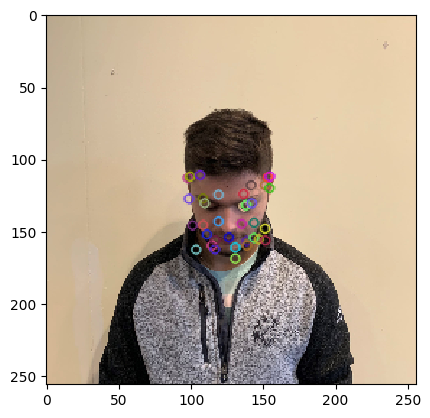

Num keypoints: 61
Num descriptors per keypoint: 128


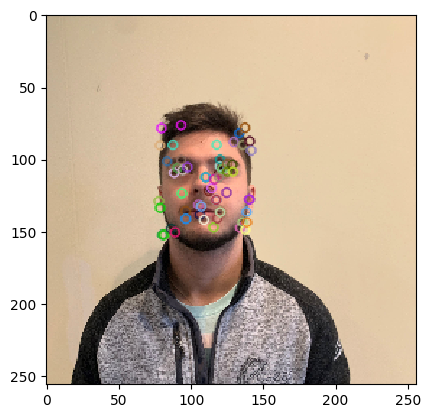

Num keypoints: 21
Num descriptors per keypoint: 128


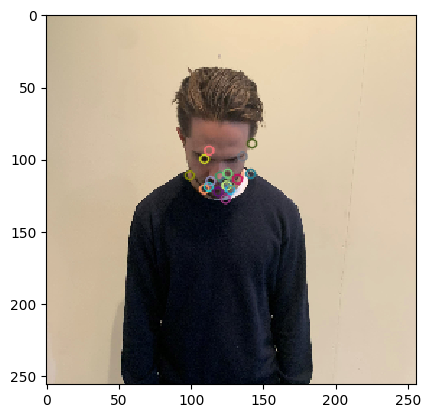

Num keypoints: 30
Num descriptors per keypoint: 128


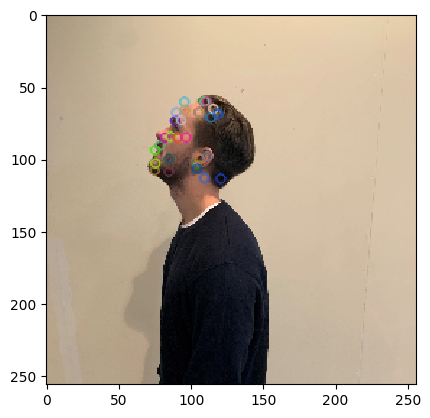

Num keypoints: 12
Num descriptors per keypoint: 128


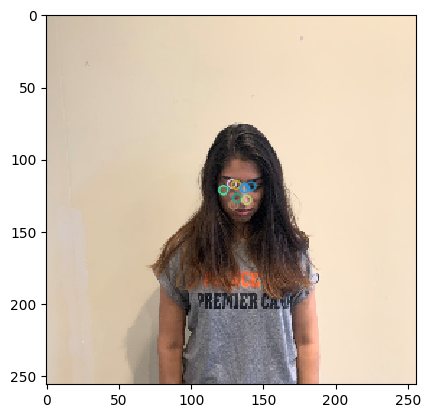

Num keypoints: 23
Num descriptors per keypoint: 128


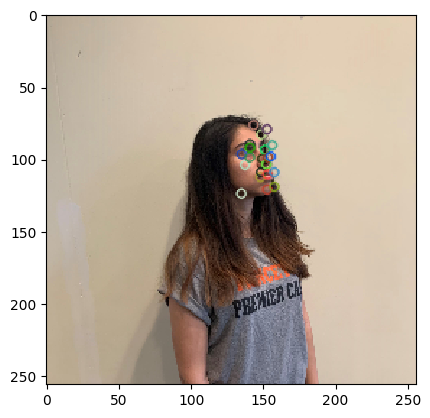

Num keypoints: 24
Num descriptors per keypoint: 128


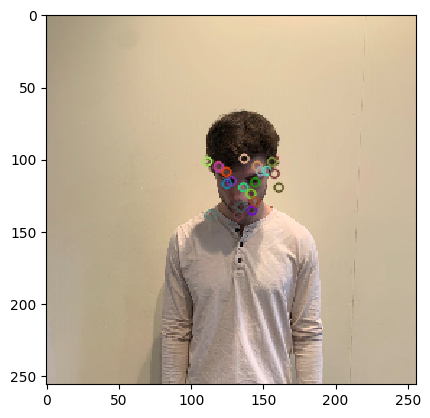

Num keypoints: 32
Num descriptors per keypoint: 128


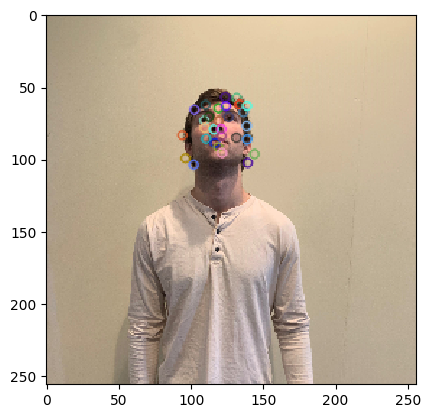

Num keypoints: 28
Num descriptors per keypoint: 128


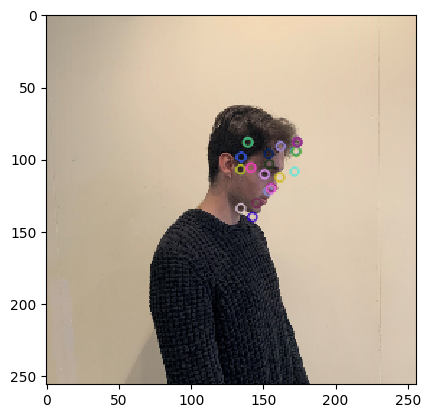

Num keypoints: 36
Num descriptors per keypoint: 128


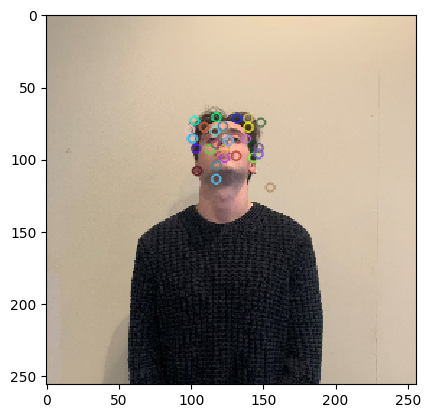

In [94]:
test_features = []
test_descriptors = []
test_labels = [2, 0, 4, 1, 3]
test_Y = []

label = -1
for i in range(len(test_ROI)):
    if(i%14 == 0):
        label += 1
    test_Y.append(test_labels[label])
    [x,y,w,h] = test_ROI[i]
    
    # create a mask image filled with zeros, the size of original image
    mask = np.zeros(test_images[i].shape[:2], dtype=np.uint8)
    
    # draw your selected ROI on the mask image
    cv2.rectangle(mask, (x,y), ((x+w),(y+h)), (255), thickness = -1)
    
    # provide mask to the detect method
    keypoints, descriptors = sift_obj.detectAndCompute(test_images[i],mask)

    test_features.append(keypoints)
    test_descriptors.append(descriptors)
    
    if (i%7==0):
        copy_test_image = test_images[i].copy()
        img_display =cv2.drawKeypoints(test_images[i],keypoints,copy_test_image)
        print('Num keypoints: '+ str(len(keypoints)))
        print('Num descriptors per keypoint: '+ str(descriptors.shape[1]))
#         plt.figure(figsize=(20,20))
        plt.imshow(img_display)
        plt.show()

In [95]:
def GMM(K_clusters,train_descriptors,test_descriptors):
    from sklearn import mixture
    
    traindata = np.float32(np.vstack(train_descriptors))
    testdata = np.float32(np.vstack(test_descriptors))
    
    # define a GMM class
    clf = mixture.GaussianMixture(n_components=K_clusters, covariance_type='full')

    # fit GMM on train data
    clf.fit(traindata)
    
    # the centers of the fitted GMM
    centers = clf.means_
    
    # predict cluster membership from the fitted GMM 
    label_train = clf.predict(traindata)
    label_test = clf.predict(testdata)
 
    num_train_feats = []
    num_test_feats = []
    
    for image in range(len(train_descriptors)):
        num_train_feats.append(len(train_descriptors[image]))
    
    for image in range(len(test_descriptors)):
        num_test_feats.append(len(test_descriptors[image]))
    
    return label_train, label_test, num_train_feats, num_test_feats

In [96]:
def BoW(predicted_labels,K_words,num_test_feats):
    
    plt.rcdefaults()
    
    counter = 0
    histograms = []
    
    # for each image in the image dataset, we want to create a histogram representing the bag of words
    for image in range(len(num_test_feats)):
        
        # create an empty array to represent the vocabulary; the size should be the number of words; this will be our hist
        histogram_array = np.zeros(K_words)
        
        # loop through each feature in a given image
        for feature in range(num_test_feats[image]):
            
            # determine the word the feature belongs to (using counter as the index here because counter iterate through the array containing all features from all images)
            word_index = predicted_labels[counter]
            
            # increase the frequency count of that word in the image
            histogram_array[word_index] += 1
            
            # increment counter
            counter += 1
            
        histograms.append(histogram_array)
    
    # normalize all histograms by dividing each word's frequency by the sum of frequencies for that image
    # makes all the word frequencies for a given image sum to 1
    histograms = histograms / np.sum(histograms, axis=1).reshape(-1,1)
    

    for i in range(3):
        clusters = np.arange(K_words)
        norm_frequencies = histograms[i]

        plt.bar(clusters, norm_frequencies, align='center', alpha=0.5)
        plt.xticks(clusters)
        plt.xlabel('Words')
        plt.ylabel('Normalized Frequency')
        plt.title('Bag of Words Histogram - Image #' + str(i+1))

        plt.show()
    
    
    return histograms

In [97]:
def nearestneighbour(test_hist,array_of_hists):
    distances = []
    for hist in range(len(array_of_hists)):
        distance = np.linalg.norm(test_hist - array_of_hists[hist])
        distances.append(distance)
    image_number = np.argmin(distances)
    return image_number

In [98]:
def assignidentity(hists_train,hists_test,train_Y,test_Y):
    # find nearest training image histogram for each test image histogram (in featurespace)
    test_nearest_neighbours = []

    for image in range(len(hists_test)):
        nearest_neighbour = nearestneighbour(hists_test[image],hists_train)
        test_nearest_neighbours.append(nearest_neighbour)
    #     print(nearest_neighbour)
    
    # assigning the face identity

    test_predictions = []

    for image in range(len(test_nearest_neighbours)):
        pic = test_nearest_neighbours[image]
        person = train_Y[pic]
        test_predictions.append(person)

    print("Predicted Person: \n")
    print(test_predictions)
    print("\n")
    print("Target Person: \n")
    print(test_Y)
    
    return test_predictions

In [99]:
def recognition_rate(test_Y,test_predictions):
    from sklearn.metrics import accuracy_score

    acc_score = accuracy_score(test_Y,test_predictions)*100

    # Print recognition rate
    print("Recognition Rate: " + ("%.2f" % acc_score) +"%\n")

    # # Manual Calculation of Recognition Rate (turns out the same as when using accuracy score)
    # correct = 0
    # for i in range(len(test_predictions)):
    #     if (test_predictions[i]==test_Y[i]):
    #         correct += 1

    # print((correct/len(test_predictions))*100)

In [100]:
def confusion_matrix(test_Y,test_predictions):
    from sklearn.metrics import confusion_matrix

    conf_mat = confusion_matrix(test_Y,test_predictions)
    normalized_conf_mat = conf_mat / np.sum(conf_mat, axis=1).reshape(-1,1)

    # Print numeric confusion matrix for exact numbers
    print("Confusion Matrix:\n")
    print(conf_mat, "\n")

    # Print normalized numeric confusion matrix for exact numbers (row sum = 1)
    print("Normalized Confusion Matrix:\n")
    np.set_printoptions(precision=2)
    print(normalized_conf_mat, "\n")

    # Plot colour map confusion matrix for visual representation
    plt.figure()
    plt.imshow(normalized_conf_mat)
    plt.title("Normalized Confusion Matrix Colour Plot"), plt.colorbar()
    plt.show()

### Cluster features into K words, create BoW histograms, and perform facial recognition on test images using nearest training histogram

In [16]:
K = 40
print(np.array(train_descriptors[0]).shape)

(32, 128)


In [17]:
# cluster training feature descriptors into "words",
# then predict which word each training and testing feature descriptor falls under
gmm_train_labels, gmm_test_labels, num_train_feats, num_test_feats = GMM(K, train_descriptors, test_descriptors)

----------------Bag of Words - Training Histograms----------------


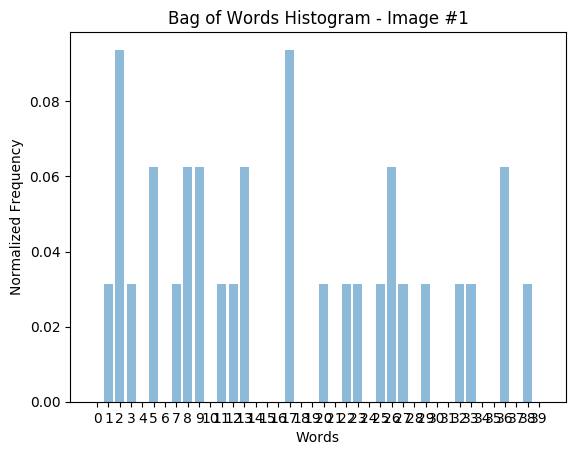

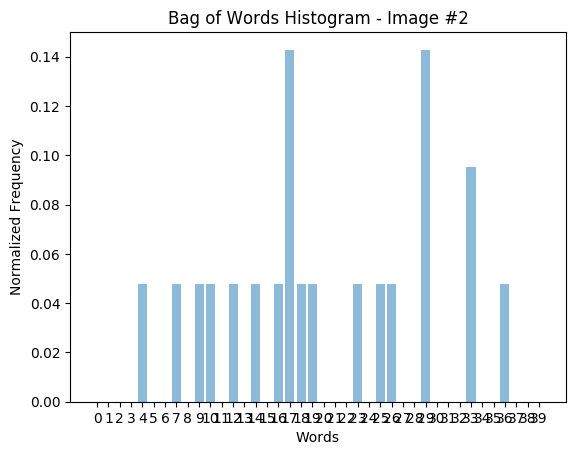

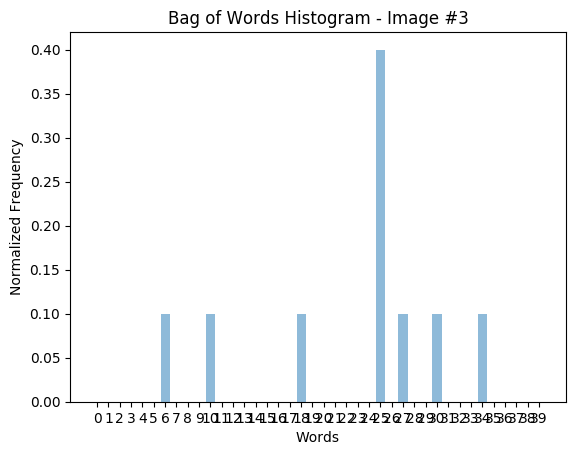

In [18]:
# using the predicted words to create BoW histograms for the training images
print("----------------Bag of Words - Training Histograms----------------")
hists_train = BoW(gmm_train_labels, K, num_train_feats)

----------------Bag of Words - Testing Histograms----------------


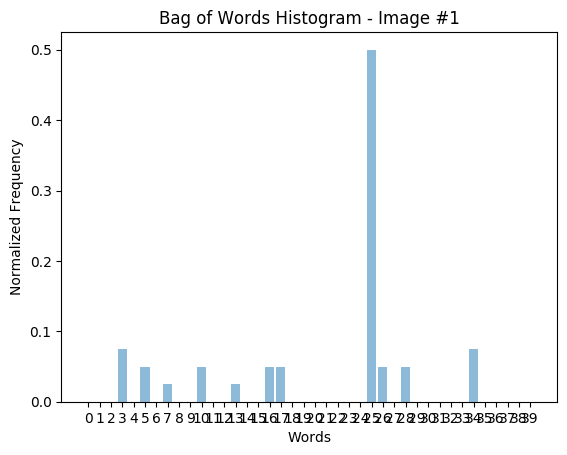

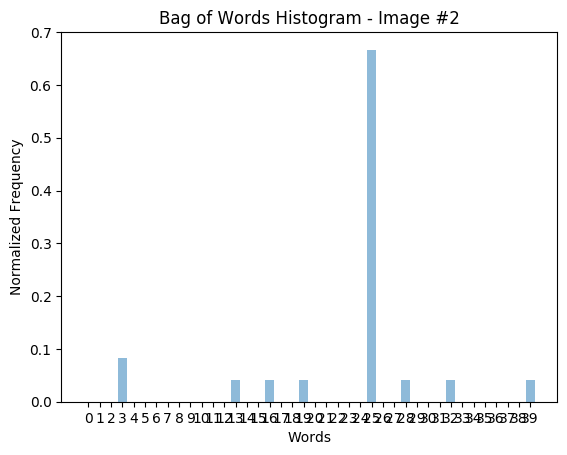

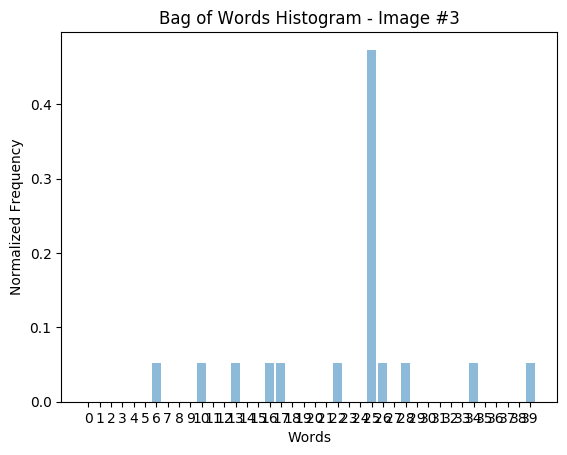

In [19]:
# using the predicted words to create BoW histograms for the testing images
print("----------------Bag of Words - Testing Histograms----------------")
hists_test = BoW(gmm_test_labels, K, num_test_feats)

In [21]:
# get predictions; i.e. predict the identity of the person in each test image
# where: 0:quentin, 1:connor, 2:bogdan, 3:julien, 4:sarah
test_predictions = assignidentity(hists_train,hists_test,train_Y,test_Y)

Predicted Person: 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Target Person: 

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


Recognition Rate: 20.00%

Confusion Matrix:

[[14  0  0  0  0]
 [14  0  0  0  0]
 [12  2  0  0  0]
 [14  0  0  0  0]
 [12  2  0  0  0]] 

Normalized Confusion Matrix:

[[1.   0.   0.   0.   0.  ]
 [1.   0.   0.   0.   0.  ]
 [0.86 0.14 0.   0.   0.  ]
 [1.   0.   0.   0.   0.  ]
 [0.86 0.14 0.   0.   0.  ]] 



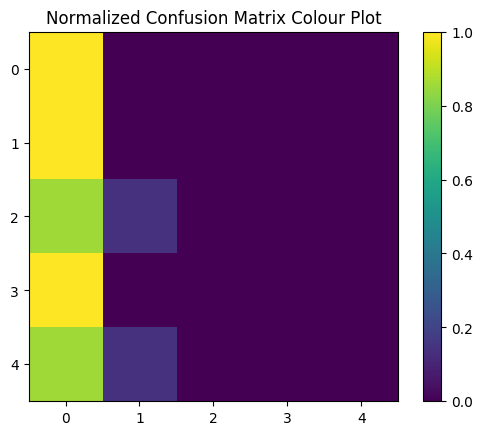

In [22]:
# obtain recognition rate and confusion matrix
recognition_rate(test_Y,test_predictions)
confusion_matrix(test_Y,test_predictions)

### 4.3 - Experiments

In [101]:
def extract_keypoint_patches(images, all_keypoints, patch_size):
    
    patched_images = []
    for image_keypoints in all_keypoints:
        # Get an integer value for each of the keypoints in an image
        # SIFT returns floating point number coordinates for keypoints
        # Hence, to get a specific pixel as a keypoint, we floor the value
        # This method brings in the possibility that two distinct keypoints are mapped to the same pixel, and thus
        # we only take unique pixels.
        keypoints = np.unique(np.floor([keypoint.pt for keypoint in image_keypoints]).astype(int), axis=0)
        
        # Break down the image into patches based on the keypoints found in SIFT
        # To put it simple, this converts each image to a list of patches centered at each keypoint
        patches = [ images[all_keypoints.index(image_keypoints)] [kp[1]-(patch_size//2):kp[1]+(patch_size//2+1), kp[1]-(patch_size//2):kp[1]+(patch_size//2)+1] for kp in keypoints]
        
        # Append image points
        patched_images.append(patches)
    
    return patched_images



In [102]:
train_patches_per_images = extract_keypoint_patches(train_images, train_features, 15)
test_patches_per_images = extract_keypoint_patches(test_images, test_features, 15)

print(np.array(train_patches_per_images[0]).shape)
print(np.array(test_patches_per_images[0]).shape)

(30, 15, 15, 3)
(36, 15, 15, 3)


### 4.3.1 HoG Descriptor 

In [25]:
def hog_features(images, img_size, cell_size = (8,8), block_size = (2,2), nbins = 9):
    # create HoG Object
    # winSize is the size of the image cropped to multiple of the cell size
    # all arguments should be given in terms of number of pixels
    hog = cv2.HOGDescriptor(_winSize=(img_size[1] // cell_size[1] * cell_size[1],
                                      img_size[0] // cell_size[0] * cell_size[0]),
                            _blockSize=(block_size[1] * cell_size[1],
                                        block_size[0] * cell_size[0]),
                            _blockStride=(cell_size[1], cell_size[0]),
                            _cellSize=(cell_size[1], cell_size[0]),
                            _nbins=nbins)

    n_cells = (img_size[0] // cell_size[0], img_size[1] // cell_size[1])

    total_hogs = []
    # Compute HoG features
    for img in images:
        hog_feats = []
        for patch in img:
            hogger = np.array(hog.compute(patch)) \
                             .reshape(n_cells[1] - block_size[1] + 1,
                                      n_cells[0] - block_size[0] + 1,
                                      block_size[1], block_size[0], nbins) \
                             .transpose((1, 0, 3, 2, 4))
            hog_feats.append(hogger.flatten())
        total_hogs.append(hog_feats)
    return total_hogs

In [39]:
hog_feats_train = hog_features(train_patches_per_images, (15,15), cell_size=(3,3), block_size=(2,2), nbins=9)
hog_feats_test = hog_features(test_patches_per_images, (15,15), cell_size=(3,3), block_size=(2,2), nbins=9)

print(np.array(hog_feats_train[0]).shape)
print(np.array(hog_feats_test[0]).shape)

(30, 576)
(36, 576)


In [40]:
# cluster training feature descriptors into "words",
# then predict which word each training and testing feature descriptor falls under
K= 20
hog_gmm_train_labels, hog_gmm_test_labels, hog_num_train_feats, hog_num_test_feats = GMM(K, hog_feats_train, hog_feats_test)

----------------Bag of Words - Training Histograms----------------


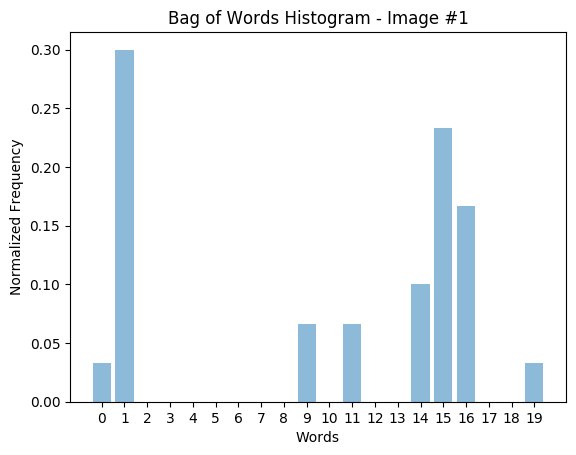

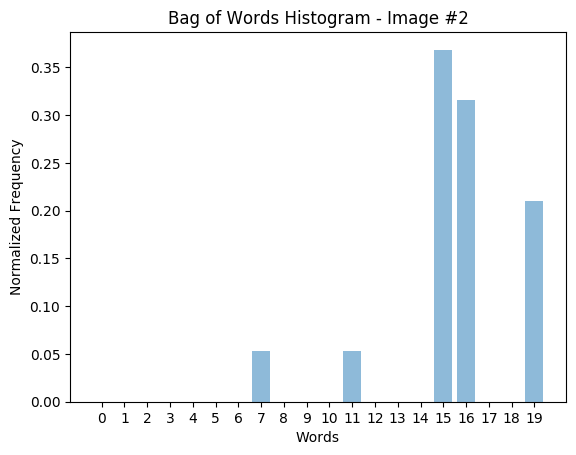

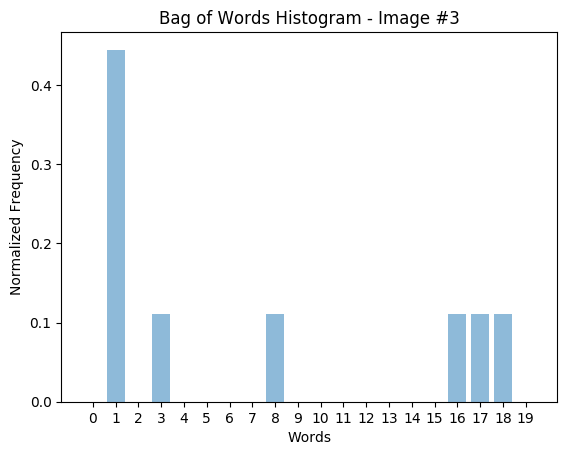

----------------Bag of Words - Testing Histograms----------------


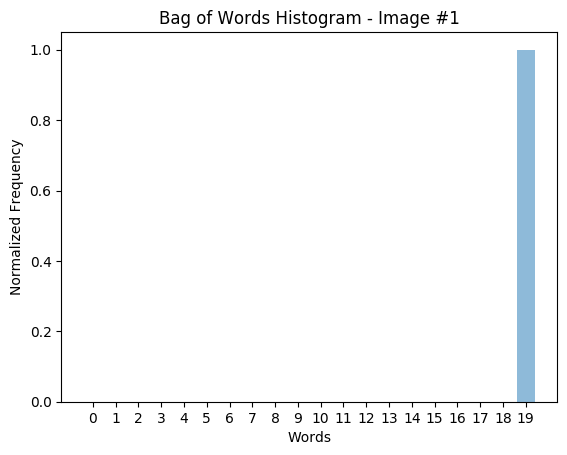

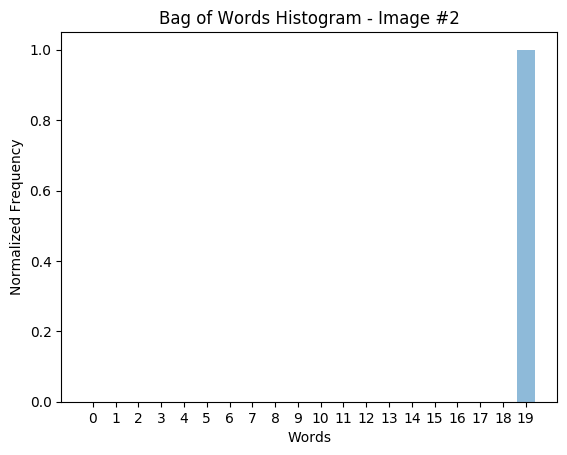

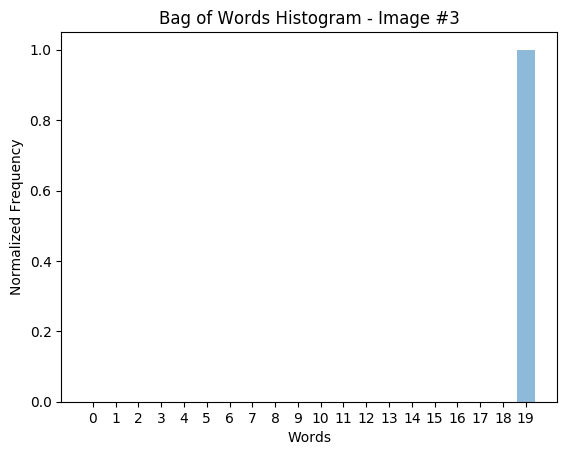

In [41]:
# using the predicted words to create BoW histograms for the training images
print("----------------Bag of Words - Training Histograms----------------")
hog_hists_train = BoW(hog_gmm_train_labels, K, hog_num_train_feats)

# using the predicted words to create BoW histograms for the testing images
print("----------------Bag of Words - Testing Histograms----------------")
hog_hists_test = BoW(hog_gmm_test_labels, K, hog_num_test_feats)

Predicted Person: 

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


Target Person: 

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Recognition Rate: 20.00%

Confusion Matrix:

[[ 0  0  0 14  0]
 [ 0  0  0 14  0]
 [ 0  0  0 14  0]
 [ 0  0  0 14  0]
 [ 0  0  0 14  0]] 

Normalized Confusion Matrix:

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]] 



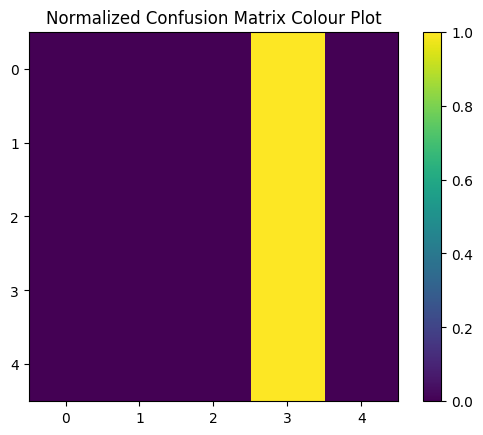

In [42]:
# get predictions; i.e. predict the identity of the person in each test image
# where: 0:quentin, 1:connor, 2:bogdan, 3:julien, 4:sarah
test_predictions = assignidentity(hog_hists_train,hog_hists_test,train_Y,test_Y)

# obtain recognition rate and confusion matrix
recognition_rate(test_Y,test_predictions)
confusion_matrix(test_Y,test_predictions)

### 4.3.2 LBP Descriptor

In [103]:
def lbp(images, n_points, radius, method='uniform'):
    from skimage.feature import local_binary_pattern
    from skimage import data
    
    all_lbp = []
    for img in images:
        lbp_feats = []
        for patch in img:
            lbp = local_binary_pattern(np.sum(patch,axis=2), n_points, radius, 'uniform')
            lbp_feats.append(lbp.flatten())
            
        all_lbp.append(lbp_feats)
    return all_lbp


In [104]:
# Settings for LBP
radius = [2, 7, 9]
n_points = list(map(lambda x: x * 8, radius))

lbp_feats_train = lbp(train_patches_per_images,n_points=n_points[0], radius=radius[0])
lbp_feats_test = lbp(test_patches_per_images,n_points=n_points[0], radius=radius[0])


In [130]:
# cluster training feature descriptors into "words",
# then predict which word each training and testing feature descriptor falls under
K= 9
lbp_gmm_train_labels, lbp_gmm_test_labels, lbp_num_train_feats, lbp_num_test_feats = GMM(K, lbp_feats_train, lbp_feats_test)

----------------Bag of Words - Training Histograms----------------


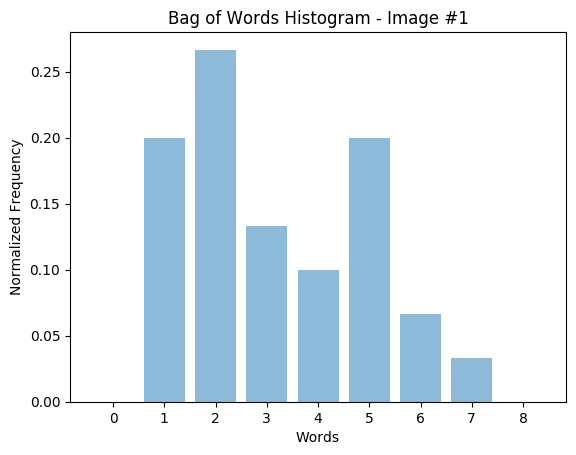

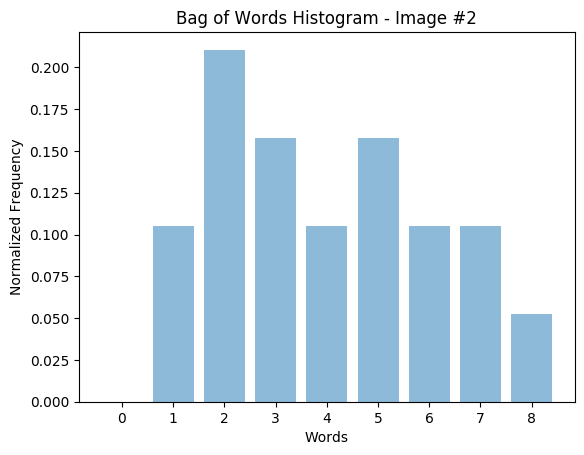

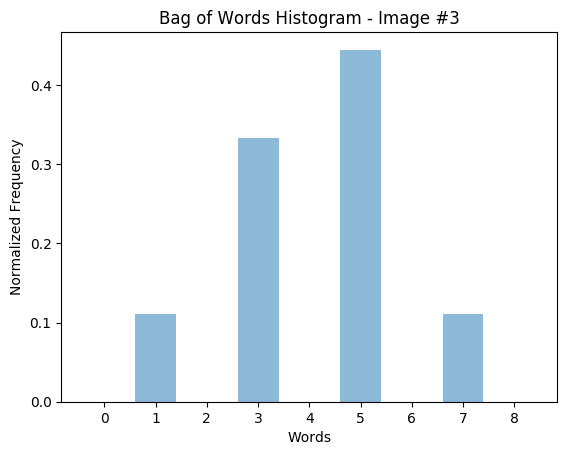

----------------Bag of Words - Testing Histograms----------------


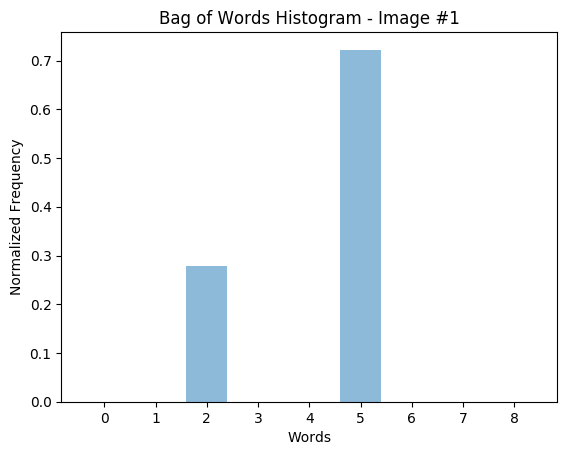

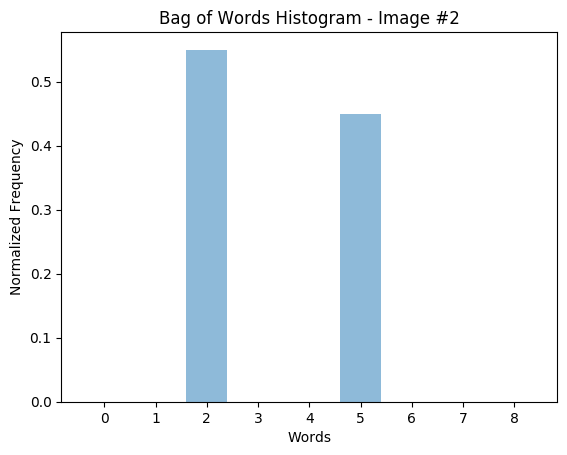

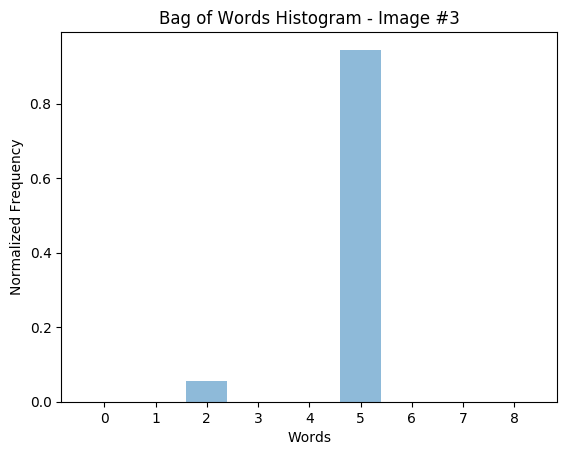

In [131]:
# using the predicted words to create BoW histograms for the training images
print("----------------Bag of Words - Training Histograms----------------")
lbp_hists_train = BoW(lbp_gmm_train_labels, K, lbp_num_train_feats)

# using the predicted words to create BoW histograms for the testing images
print("----------------Bag of Words - Testing Histograms----------------")
lbp_hists_test = BoW(lbp_gmm_test_labels, K, lbp_num_test_feats)

Predicted Person: 

[4, 3, 4, 4, 4, 0, 3, 0, 0, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


Target Person: 

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Recognition Rate: 20.00%

Confusion Matrix:

[[ 1  0  0  0 13]
 [ 0  0  0  2 12]
 [ 3  0  0  2  9]
 [ 0  0  0  0 14]
 [ 1  0  0  0 13]] 

Normalized Confusion Matrix:

[[0.07 0.   0.   0.   0.93]
 [0.   0.   0.   0.14 0.86]
 [0.21 0.   0.   0.14 0.64]
 [0.   0.   0.   0.   1.  ]
 [0.07 0.   0.   0.   0.93]] 



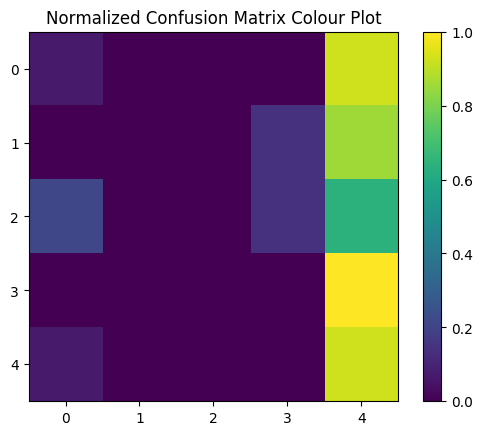

In [132]:
# get predictions; i.e. predict the identity of the person in each test image
# where: 0:quentin, 1:connor, 2:bogdan, 3:julien, 4:sarah
test_predictions = assignidentity(lbp_hists_train,lbp_hists_test,train_Y,test_Y)

# obtain recognition rate and confusion matrix
recognition_rate(test_Y,test_predictions)
confusion_matrix(test_Y,test_predictions)